<a href="https://colab.research.google.com/github/jadsoncastro/IA-codigos-disciplina/blob/main/Logica-Fuzzy/fuzzy-scikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação de bibliotecas

In [ ]:
#Instalar biblioteca scikit fuzzy
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

import matplotlib.pyplot as plt

# Implementação de um sistema fuzzy

O problema implementado consiste na especificação do valor da gorgeta que será dada ao garçon, considerando aspectos como qualidade do serviço e da comida. O exemplo foi implementado com o pacote scikit-fuzzy.


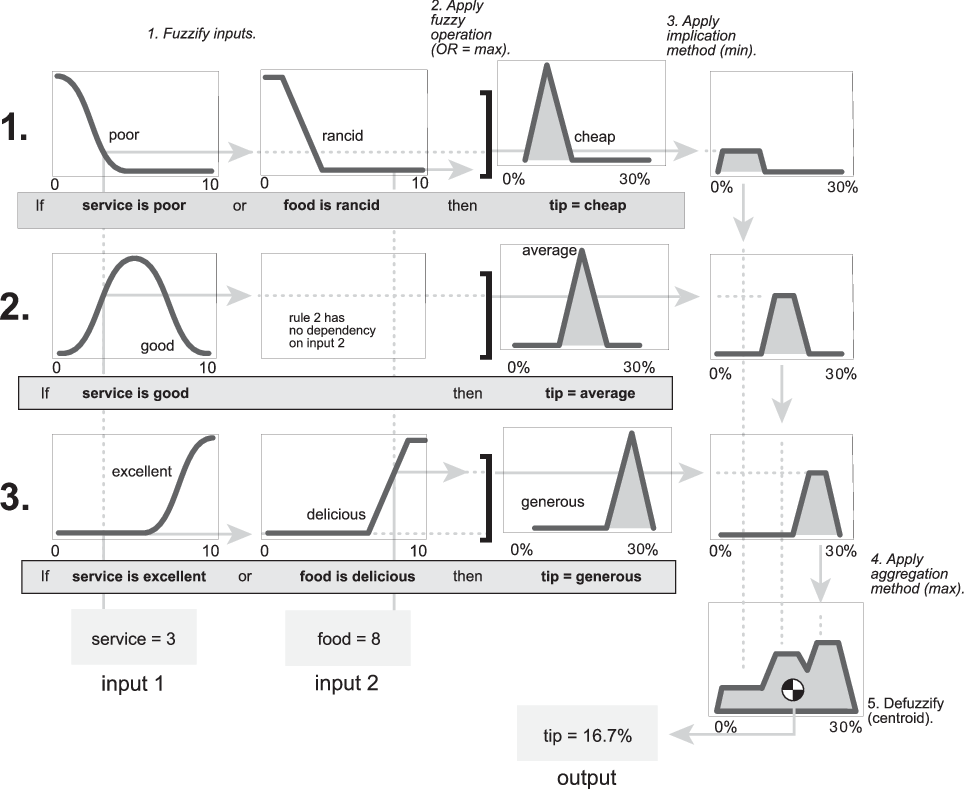

##Implementação dos antecedentes e consequentes

In [ ]:
food = ctrl.Antecedent(np.arange(0, 11, 0.2), 'food')
service = ctrl.Antecedent(np.arange(0, 11, 0.2), 'service')
tip = ctrl.Consequent(np.arange(0, 31, 1), 'tip')

##Definição das funções de pertinência para os antecedentes e para o consequente

In [ ]:
food['rancid'] = fuzz.trapmf(food.universe, [0, 0, 2, 4])
food['delicious'] = fuzz.trapmf(food.universe, [6, 9, 10, 1000])

service['poor'] = fuzz.sigmf(service.universe, 2, -2)
service['good'] = fuzz.gaussmf(service.universe, 5, 1)
service['excellent'] = fuzz.sigmf(service.universe, 8, 2)

tip['cheap'] = fuzz.trimf(tip.universe, [2, 6, 10])
tip['average'] = fuzz.trimf(tip.universe, [8, 15, 25])
tip['generous'] = fuzz.trimf(tip.universe, [20, 30, 30])

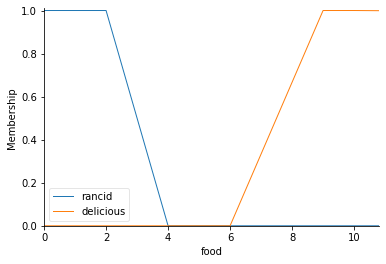

In [ ]:
#plt.figure(figsize=(20,20))
food.view()

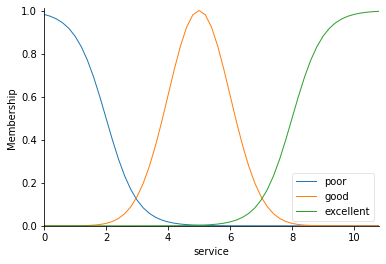

In [ ]:
service.view()

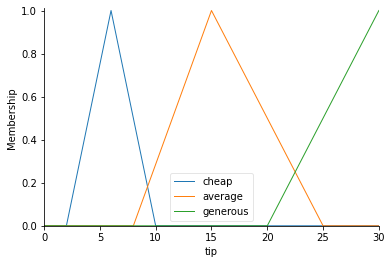

In [ ]:
tip.view()

##Implementação das regras

* If the service is **poor** OR the food is **rancid**, then the tip will be **cheap**
* If the service is **good**, then the tip will be **average**
* If the service is **excellent** OR the food is **delicious**, then the tip will be **generous**

In [ ]:
rule1 = ctrl.Rule(service['poor'] | food['rancid'], tip['cheap'])
rule2 = ctrl.Rule(service['good'], tip['average'])
rule3 = ctrl.Rule(service['excellent'] | food['delicious'], tip['generous'])

##Implementação do controle e da simulação

In [ ]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

tipping = ctrl.ControlSystemSimulation(tipping_ctrl,)

In [ ]:
tipping.input['service'] = 10
tipping.input['food'] = 10

tipping.compute() #Compute as regras

##Visualização dos resultados

The tip suggested percentage given service and food was 26.67%


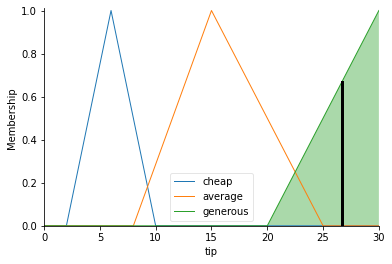

In [ ]:
print("The tip suggested percentage given service and food was %.2f%%" % tipping.output['tip'])

tip.view(sim=tipping)